## Problem Statement

Reserve Bank of India collects various financial information from public and private sector banks as well as other govt entities. Based on information RBI publishes various financial and economic report for public information. One of such report is Consumer Survey Index which provides information on income levels of Indian consumers. 

Based on consumer survey data available, considering multiple factors (features) like No of Earning Members in the Family vs No of Family Members, consumers Annual Income is to be categorized into different segment like “Below Poverty Line”, “Low Income”,” Mid Income” etc. 


## Overall Summary of the Solution

As Logistic Regression supports classification of data only in 2 clusters, approach of categorizing consumers into 3 different segments have been changed and now consumers Annual Income would be instead categorized into 2 different segments i.e. Below Average Income and Above Average Income.

Annual Income below Rs.3 lacs has been categorized as Below Average Income and above Rs.3 lacs has been categorized as Above Average Income.

Classification techniques used to solve the problem are mentioned below.

1.	Naïve Bayes
2.	Decision Tree
3.	Logistic Regression
4.	KNN
5.	Support Vector Machine
6.	Random Forest


Almost all classification techniques have resulted in similar confusion matrix and accuracy percentage.


In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading Data
df=pd.read_excel(r"C:\Users\nisha\OneDrive\Desktop\GREAT LEARNING COURSES\Shinakshi Didi Material\Consumer Categorisation\Classification Data.xlsx")

In [3]:
df.head()

,Serial No.,Period,City,Age,Lowe Range,Upper Range,Gender,Annual Income,Assembly Constituency Name,Educational Qualification,No. of Family Members,No. of Earning members in the family,Occupation of Respondent
0,1,2019-07-31,Ahmedabad,22-29 year,22,29,Female,Rs. 1 lakh or less,Amaraiwadi,12th Std,5 and more,3.0,House wife
1,2,2019-07-31,Ahmedabad,22-29 year,22,29,Female,Rs. 1 lakh or less,Amaraiwadi,5th Std-Below 10th Std,5 and more,2.0,Daily worker
2,3,2019-07-31,Ahmedabad,22-29 year,22,29,Female,Rs. 1 lakh or less,Amaraiwadi,Below 5th Std,3 or 4,1.0,House wife
3,4,2019-07-31,Ahmedabad,22-29 year,22,29,Female,Rs. 1 lakh or less,Amaraiwadi,Graduate,5 and more,1.0,House wife
4,5,2019-07-31,Ahmedabad,NaN,22,29,Female,Rs. 1 lakh or less,Amaraiwadi,Illiterate,5 and more,1.0,House wife


## Detailed description and analysis of solution

Data downloaded from RBI website using web scraping is imported in python to for data analysis. Before any processing, data has total 13 columns and 5351 records.

During data analysis it has been observed that apart from 2 variables Lower Age and Upper Age rest all variables contain null values. All such null values have been replaced with median for numerical variables and with mode for categorical variables. 

As Annual Income is to be divided into 2 classes, income below 3 lacs have been replaced with value 0 (4710 records) and income above 3 lacs have been replaced with value 1 (641 records). 

Data contains 7 columns having categorical values namely (Gender, Annual Income, City, Occupation of Respondent, No. of Family Members, Educational Qualification, Assembly Constituency Name, No. of Earning members in the family). Label encoding technique has been used to convert the categorical values to type numeric.

Correlation Matrix and Heatmap Graph has been used to understand collinearity between the variables and it has been found that variable No of Earning Members in the Family is highly correlated to Annual Income.


In [4]:
df.shape # Checking number of rows and columns

(5351, 13)

In [5]:
df.columns #Columns in the dataframe

Index(['Serial No.', 'Period', 'City', 'Age', 'Lowe Range', 'Upper Range',
       'Gender', 'Annual Income', 'Assembly Constituency Name',
       'Educational Qualification', 'No. of Family Members',
       'No. of Earning members in the family', 'Occupation of Respondent'],
      dtype='object')

In [6]:
print("Different City:\n",df['City'].value_counts(),"\n")           #Checking Categories in each column
print("Total no. of city:",df['City'].value_counts().shape,'\n')

print("Annual Income:\n",df['Annual Income'].value_counts(),"\n")
print("Total Income Group:",df['Annual Income'].value_counts().shape,"\n")

print("Different Lower Age:\n",df['Lowe Range'].value_counts(),"\n")
print("Total count of age:",df['Lowe Range'].value_counts().shape,'\n')
print("Different Upper Age:\n",df['Upper Range'].value_counts(),"\n")
print("Total count of age:",df['Upper Range'].value_counts().shape,'\n')

print("Gender:\n",df['Gender'].value_counts(),"\n")
print("Total:",df['Gender'].value_counts().shape,'\n')

print("Different Assembly Name:\n",df['Assembly Constituency Name'].value_counts(),"\n")
print("Total Assembly:",df['Assembly Constituency Name'].value_counts().shape,'\n')

print("Different Education:\n",df['Educational Qualification'].value_counts(),"\n")
print("Total category type:",df['Educational Qualification'].value_counts().shape,'\n')

print("Different No. of Family Members:\n",df['No. of Family Members'].value_counts(),"\n")
print("Total category count:",df['No. of Family Members'].value_counts().shape,'\n')

print("Different Occupation:\n",df['Occupation of Respondent'].value_counts(),"\n")
print("Total category count:",df['Occupation of Respondent'].value_counts().shape,'\n')

print("Different No. of Earning members in the family:\n",df['No. of Earning members in the family'].value_counts(),"\n")
print("Total category count:",df['No. of Earning members in the family'].value_counts().shape,'\n')

Different City:
 Delhi         957
Mumbai        895
Bengaluru     699
Kolkata       649
Hyderbad      498
Ahmedabad     399
Chennai       399
Jaipur        200
Lucknow       200
Bhopal        149
Guwahati      100
Patna         100
Trivandrum    100
Name: City, dtype: int64 

Total no. of city: (13,) 

Annual Income:
 Rs. 1 to less than 3 lakh    2739
Rs. 1 lakh or less           1960
Rs. 3 lakh to 5 lakh          461
Rs. 5 lakh or more            180
Name: Annual Income, dtype: int64 

Total Income Group: (4,) 

Different Lower Age:
 40    1746
22    1585
30    1470
60     550
Name: Lowe Range, dtype: int64 

Total count of age: (4,) 

Different Upper Age:
 59     1746
29     1585
39     1470
100     550
Name: Upper Range, dtype: int64 

Total count of age: (4,) 

Gender:
 Male      2901
Female    2445
Name: Gender, dtype: int64 

Total: (2,) 

Different Assembly Name:
 Amaraiwadi             57
Kashipur-Belgachhia    55
Thakakarbapa nagar     46
Kasba                  45
Asarwa     

In [7]:
#Renaming Columns
df.rename({'Lowe Range':'Lower Age','Upper Range':'Upper Age'},axis=1,inplace=True)

In [8]:
#Dropping insignificant variables
df.drop(['Serial No.','Period','Age'],axis=1,inplace=True)

In [9]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  5345 non-null   object 
 1   Lower Age                             5351 non-null   int64  
 2   Upper Age                             5351 non-null   int64  
 3   Gender                                5346 non-null   object 
 4   Annual Income                         5340 non-null   object 
 5   Assembly Constituency Name            5344 non-null   object 
 6   Educational Qualification             5340 non-null   object 
 7   No. of Family Members                 5343 non-null   object 
 8   No. of Earning members in the family  5344 non-null   float64
 9   Occupation of Respondent              5339 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 418.2+ KB


In [10]:
#Checking for missing values
df.isnull().sum()

City                                     6
Lower Age                                0
Upper Age                                0
Gender                                   5
Annual Income                           11
Assembly Constituency Name               7
Educational Qualification               11
No. of Family Members                    8
No. of Earning members in the family     7
Occupation of Respondent                12
dtype: int64

In [11]:
#Treatment of missing values

In [12]:
cat_cols=df.select_dtypes(include='object').columns

In [13]:
cat_cols

Index(['City', 'Gender', 'Annual Income', 'Assembly Constituency Name',
       'Educational Qualification', 'No. of Family Members',
       'Occupation of Respondent'],
      dtype='object')

In [14]:
num_cols=df.select_dtypes(include=np.number).columns

In [15]:
num_cols

Index(['Lower Age', 'Upper Age', 'No. of Earning members in the family'], dtype='object')

In [16]:
for i in cat_cols:                      #Missing values in categorical column are treated using mode
    df[i]=df[i].fillna(df[i].mode()[0])

In [17]:
for i in num_cols:                       #Missing values in numerical columns are treated using median
    df[i]=df[i].fillna(df[i].median())

In [18]:
df.isnull().sum() #Missing Values are treated

City                                    0
Lower Age                               0
Upper Age                               0
Gender                                  0
Annual Income                           0
Assembly Constituency Name              0
Educational Qualification               0
No. of Family Members                   0
No. of Earning members in the family    0
Occupation of Respondent                0
dtype: int64

In [19]:
df.dtypes

City                                     object
Lower Age                                 int64
Upper Age                                 int64
Gender                                   object
Annual Income                            object
Assembly Constituency Name               object
Educational Qualification                object
No. of Family Members                    object
No. of Earning members in the family    float64
Occupation of Respondent                 object
dtype: object

In [20]:
#Converting into binary classification

In [21]:
df['Annual Income'] = df['Annual Income'].replace(['Rs. 1 to less than 3 lakh', 'Rs. 1 lakh or less'], '0')
df['Annual Income']= df['Annual Income'].replace(['Rs. 3 lakh to 5 lakh', 'Rs. 5 lakh or more'], '1')

In [22]:
print("Annual Income:\n",df['Annual Income'].value_counts(),"\n")          #Proportion of categories in target column
print("Annual Income:\n",df['Annual Income'].value_counts(normalize=True),"\n") 
print("Total Income Group:",df['Annual Income'].value_counts().shape,"\n")

Annual Income:
 0    4710
1     641
Name: Annual Income, dtype: int64 

Annual Income:
 0    0.880209
1    0.119791
Name: Annual Income, dtype: float64 

Total Income Group: (2,) 



In [23]:
#Encoding Categorical Variables

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Annual Income']=le.fit_transform(df['Annual Income'])
df['City']=le.fit_transform(df['City'])
df['Occupation of Respondent']=le.fit_transform(df['Occupation of Respondent'])
df['No. of Family Members']=le.fit_transform(df['No. of Family Members'])
df['Educational Qualification']=le.fit_transform(df['Educational Qualification'])
df['Assembly Constituency Name']=le.fit_transform(df['Assembly Constituency Name'])
df['No. of Earning members in the family']=le.fit_transform(df['No. of Earning members in the family'])

In [25]:
#Checking Correlation

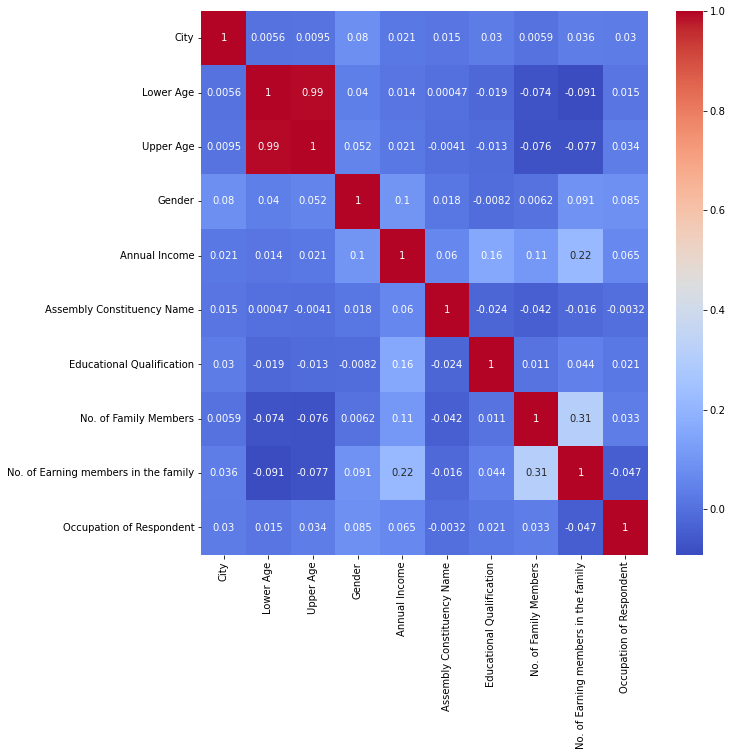

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [27]:
df.dtypes

City                                    int32
Lower Age                               int64
Upper Age                               int64
Gender                                  int32
Annual Income                           int32
Assembly Constituency Name              int32
Educational Qualification               int32
No. of Family Members                   int32
No. of Earning members in the family    int64
Occupation of Respondent                int32
dtype: object

## Target Variable and Predictors 

Variables No of Earning members in the family, No of Family Members, Educational Qualification, Gender have been considered as predictor or independent variable and variable Annual Income has been considered as response or dependent variable. While applying all six techniques data has been split into train and test data set with 80:20 ratio.

In [28]:
X = df[['No. of Earning members in the family','No. of Family Members','Educational Qualification','Gender']]
y = df['Annual Income']

In [29]:
#Importing Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [30]:
#Splitting into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [31]:
#Fit our Naive Bayes model to training data
GNB=GaussianNB()
model=GNB.fit(X_train,y_train)

In [32]:
#Prediction on validatation/test data
y_pred=model.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Evaluation**

In [34]:
accuracy_score(y_test,y_pred)

0.8674136321195145

In [35]:
                                                                    #predicted
                                                           #          0    1
confusion_matrix(y_test,y_pred)                            #       0 #TN  FP
                                                           #actual 1 #FN  TP

array([[912,  31],
       [111,  17]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       943
           1       0.35      0.13      0.19       128

    accuracy                           0.87      1071
   macro avg       0.62      0.55      0.56      1071
weighted avg       0.83      0.87      0.84      1071



**ROC AUC Curve**

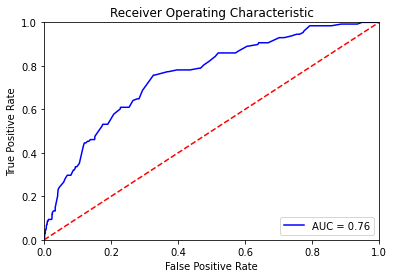

In [37]:
import sklearn.metrics as metrics
#Checking fpr and tpr for all thresholds of classification

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Naive Bayes**

GaussianNB module of SKLEARN library is used to perform classification. Model has been trained approx. 4280 records and tested on 1070 records. With validating test records model predicts 86.74% accuracy.

**F1-Score:0.19**

**ROC / AUC Curve**
AUC curve at 76% shows that classes are separated with certain overlap.



# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dc=DecisionTreeClassifier(max_leaf_nodes=15)

In [40]:
model=dc.fit(X_train,y_train)

In [41]:
y_pred=model.predict(X_test)

**Evaluation**

In [42]:
accuracy_score(y_test,y_pred)

0.8832866479925303

In [43]:
confusion_matrix(y_test,y_pred)

array([[938,   5],
       [120,   8]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       943
           1       0.62      0.06      0.11       128

    accuracy                           0.88      1071
   macro avg       0.75      0.53      0.53      1071
weighted avg       0.85      0.88      0.84      1071



**ROC AUC CURVE**

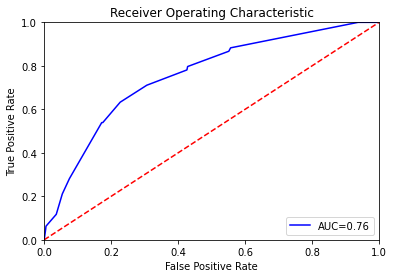

In [45]:
import sklearn.metrics as metrics
#Check fpr and tpr for all thresholds of classification

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Decision Tree**

Gini Index criteria with maximum 15 leaf nodes are used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 88.32%.

**F1-Score:0.11**


**ROC / AUC Curve** AUC curve at 76% shows that classes are separated with certain overlap.

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
model=lr.fit(X_train,y_train)

In [49]:
y_pred=model.predict(X_test)

**Evaluation**

In [50]:
accuracy_score(y_test,y_pred)

0.8814192343604108

In [51]:
confusion_matrix(y_test,y_pred)

array([[939,   4],
       [123,   5]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       943
           1       0.56      0.04      0.07       128

    accuracy                           0.88      1071
   macro avg       0.72      0.52      0.50      1071
weighted avg       0.84      0.88      0.83      1071



**ROC AUC Curve**

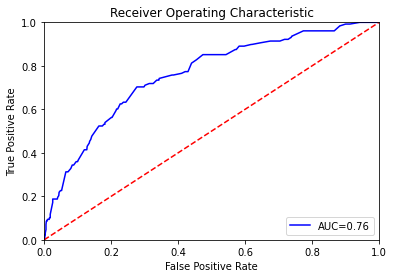

In [53]:
import sklearn.metrics as metrics

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



**Logistic Regression**

Logistic model is used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 88.14%.

**F1-Score:0.07**

**ROC / AUC Curve** AUC curve at 76% shows that classes are separated with certain overlap.

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn=KNeighborsClassifier()

In [56]:
model=knn.fit(X_train,y_train)

In [57]:
y_pred=model.predict(X_test)

**Evaluation**

In [58]:
accuracy_score(y_test,y_pred)

0.8720821661998133

In [59]:
confusion_matrix(y_test,y_pred)

array([[926,  17],
       [120,   8]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       943
           1       0.32      0.06      0.10       128

    accuracy                           0.87      1071
   macro avg       0.60      0.52      0.52      1071
weighted avg       0.82      0.87      0.83      1071



**ROC AUC Curve**

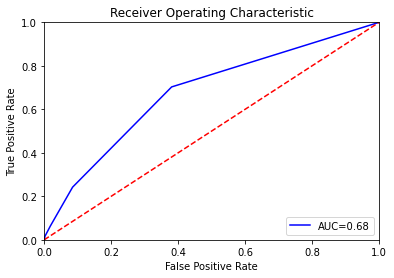

In [61]:
import sklearn.metrics as metrics

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**K Nearest Neighbors**

KNN is used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 87.20%.

**F1-Score:0.10**

**ROC / AUC Curve** AUC curve at 68% shows that classes are separated with certain overlap.

# SVM

In [62]:
import sklearn.svm as svm

In [63]:
s=svm.SVC(kernel='linear',probability=True)

In [64]:
model=s.fit(X_train,y_train)

In [65]:
y_pred=model.predict(X_test)

**Evaluation**

In [66]:
accuracy_score(y_test,y_pred)

0.880485527544351

In [67]:
confusion_matrix(y_test,y_pred)

array([[943,   0],
       [128,   0]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       943
           1       0.00      0.00      0.00       128

    accuracy                           0.88      1071
   macro avg       0.44      0.50      0.47      1071
weighted avg       0.78      0.88      0.82      1071



C:\Users\nisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ROC AUC Curve**

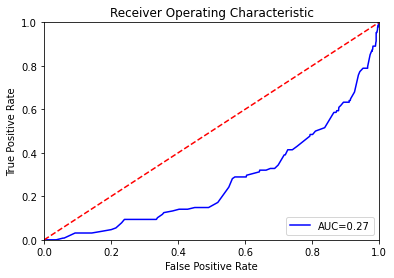

In [69]:
import sklearn.metrics as metrics

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Support Vector Machines**

SVM is used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 88.04%.

**F1-Score:0.00**

**ROC / AUC Curve** AUC curve at 27% shows that classes are separated with certain overlap.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier(n_estimators=50)

In [72]:
modelrfc=rf.fit(X_train,y_train)

In [73]:
y_pred=modelrfc.predict(X_test)

**Evaluation**

In [74]:
accuracy_score(y_test,y_pred)

0.880485527544351

In [75]:
confusion_matrix(y_test,y_pred)

array([[933,  10],
       [118,  10]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       943
           1       0.50      0.08      0.14       128

    accuracy                           0.88      1071
   macro avg       0.69      0.53      0.54      1071
weighted avg       0.84      0.88      0.84      1071



**ROC AUC Curve**

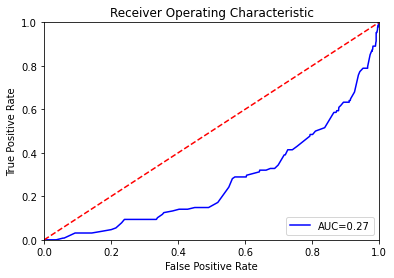

In [77]:
import sklearn.metrics as metrics

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Random Forest**

Random Forest is used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 87.76%.

**F1-Score:0.12**

**ROC / AUC Curve** AUC curve at 76% shows that classes are separated with certain overlap.

# Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gb=GradientBoostingClassifier()

In [80]:
model=gb.fit(X_train,y_train)

In [81]:
y_pred=model.predict(X_test)

**Evaluation**

In [82]:
accuracy_score(y_test,y_pred)

0.8823529411764706

In [83]:
confusion_matrix(y_test,y_pred)

array([[938,   5],
       [121,   7]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       943
           1       0.58      0.05      0.10       128

    accuracy                           0.88      1071
   macro avg       0.73      0.52      0.52      1071
weighted avg       0.85      0.88      0.84      1071



**ROC AUC Curve**

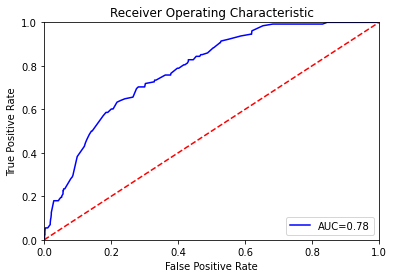

In [85]:
import sklearn.metrics as metrics

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Gradient Boosting**

GB is used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 88.23%.

**F1-Score:0.10**

**ROC / AUC Curve** AUC curve at 78% shows that classes are separated with certain overlap.

# Extreme Gradient Boosting

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb=XGBClassifier()

In [88]:
model=xgb.fit(X_train,y_train)

In [89]:
y_pred=model.predict(X_test)

**Evaluation**

In [90]:
accuracy_score(y_test,y_pred)

0.8758169934640523

In [91]:
confusion_matrix(y_test,y_pred)

array([[929,  14],
       [119,   9]], dtype=int64)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       943
           1       0.39      0.07      0.12       128

    accuracy                           0.88      1071
   macro avg       0.64      0.53      0.53      1071
weighted avg       0.83      0.88      0.84      1071



**ROC AUC Curve**

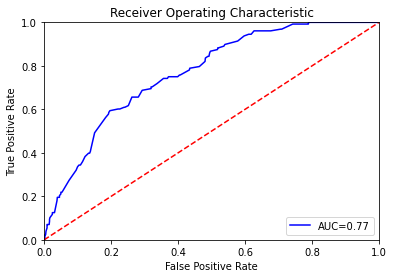

In [93]:
import sklearn.metrics as metrics

probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Extreme Gradient Boosting**

XGB is used to perform classification. Post applying criteria on train data and validating the test data model predicts accuracy of 87.58%.

**F1-Score:0.12**

**ROC / AUC Curve** AUC curve at 77% shows that classes are separated with certain overlap.

## Feature Importance

In [95]:
features=pd.Series(modelrfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)

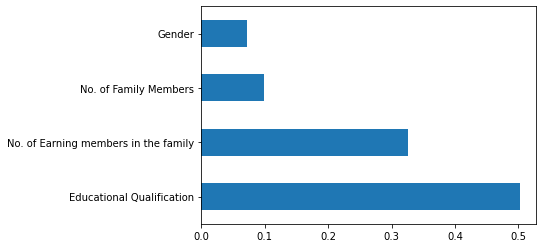

In [96]:
features.plot(kind="barh")
plt.show()

# Identification of Best Model

**Random Forest, KNN, Logistic Regression, Decision Tree Gradient Boosting and Extreme Gradient Boosting all show nearby same accuracy and AUC Ratio but amongst all the model Naive Bayes Classifer has the highest f1 score , hence Naive Bayes Classifier is chosen as best model amongst all the models.**

## Lessons learnt from project

Understanding of data from both the perspective i.e. technical and functional (Domain) is very important to proceed ahead with data cleaning and exploration. It is the base of constructing a good classification model.

Data analysis and cleaning is an important task as at this stage lot of important decision are to be made i.e. whether to replace blank data with NaN value or Mean value of rest of the data. Data analysis helps to decide kind of encoding to be used for conversion of categorical data to numerical. 

Data exploration helps to visualize the relationship between predictor and response variable. It helps to identify highly correlated variable which can be attributed to train / test data.

Any kind of misjudgement either at Data analysis / cleaning or Data Exploration may lead incorrect output in terms of Model Prediction Accuracy or Confusion Matrix which may ultimately lead to revisit the entire approach beginning from stage 1 i.e. Understanding the data.

More the number of techniques, better the chances to find anomalies or error. Merely applying only technique will not give best model hence it is advisable to use all the techniques and compare the results to find out best of model for a given data set.
